## **Name:** Affan Zulfiqar

---

## **Reg No:** B22F0144AI050
---
## **Course:** Digital Image Processing (5)
---
# **Section:** AI-Fall-22-Blue


**Importing Libraries**

In [13]:
import numpy as np
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Scenario no 01:** Bit-Plane Slicing for Document Scanning

**Explanation:**

Extracts and visualizes the individual bit planes (0-7) of a grayscale image. It then enhances the image by combining the 5th, 6th, and 7th bit planes and normalizing the result for improved contrast.

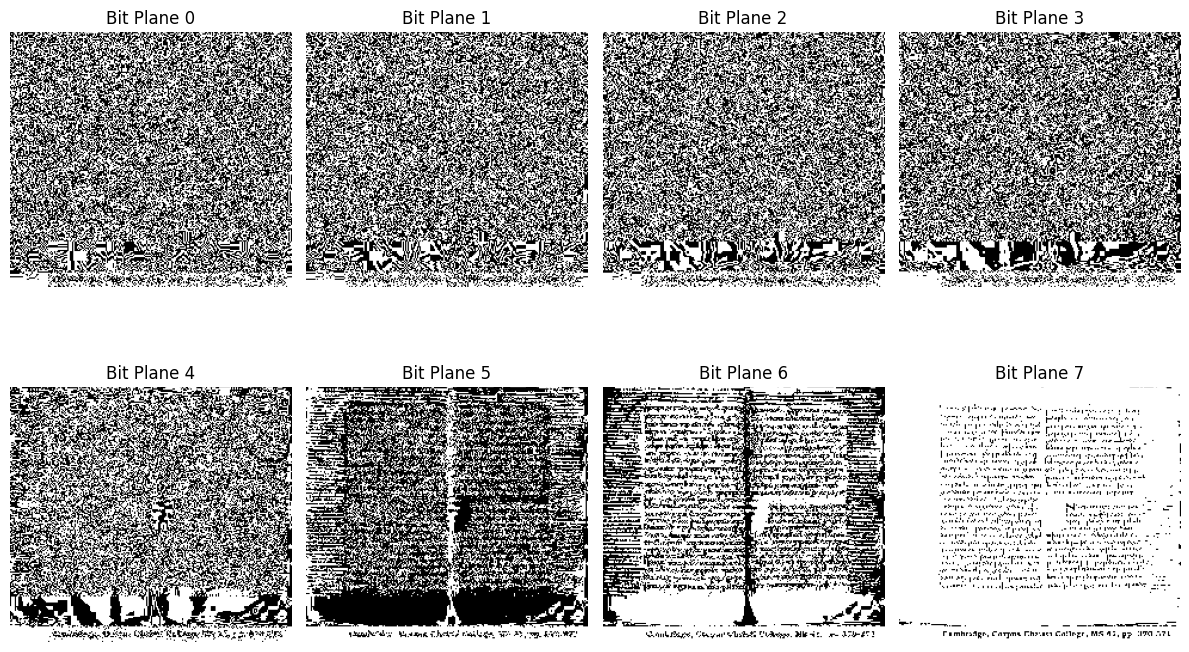

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Scanerio 01.png'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

bit_planes = []
for i in range(8):
    bit_plane = (original_image >> i) & 1
    bit_planes.append(bit_plane * 255)

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

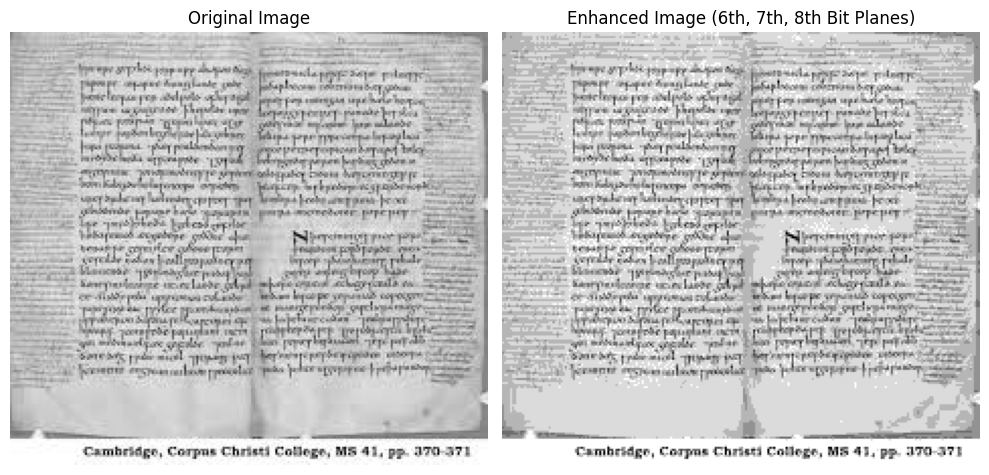

In [15]:
bit5 = cv2.bitwise_and(original_image, 1 << 5)
bit6 = cv2.bitwise_and(original_image, 1 << 6)
bit7 = cv2.bitwise_and(original_image, 1 << 7)

enhanced = cv2.bitwise_or(bit5, bit6)
enhanced = cv2.bitwise_or(enhanced, bit7)

enhanced = cv2.normalize(enhanced, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced, cmap='gray')
plt.title("Enhanced Image (6th, 7th, 8th Bit Planes)")
plt.axis('off')

plt.tight_layout()
plt.show()

# **Scenario no 02 :** Histogram Processing for Medical Imaging

**Explanation:**

Displaying the histogram of a grayscale medical image to analyze its pixel intensity distribution. Then checks the exposure status of the image which is underexposed and enhances the image by stretching its intensity values to improve contrast before displaying the original and enhanced images side by side.

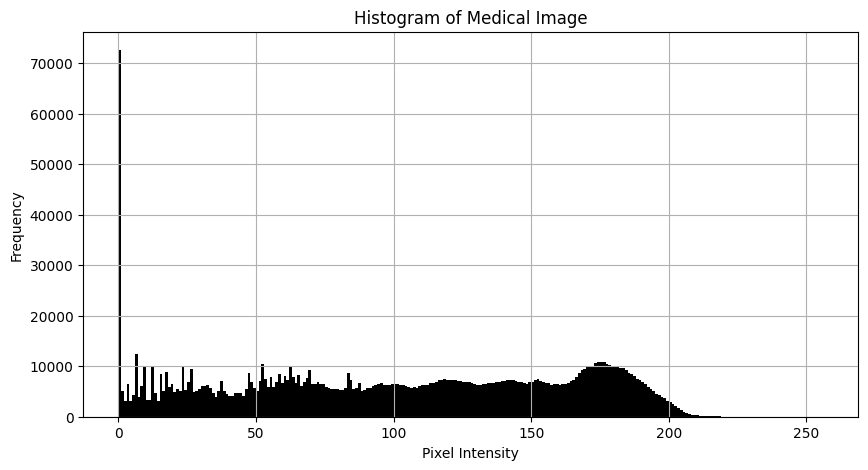

Exposure Status: Underexposed


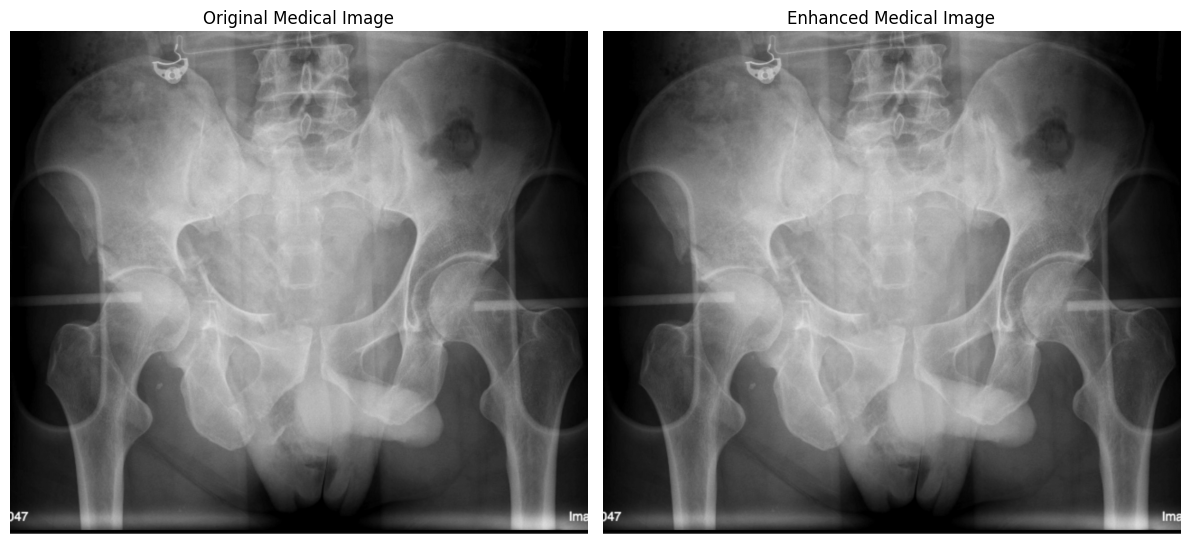

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Scanerio 02.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.hist(original_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Medical Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

def check_exposure(image):
    """Check if the image is underexposed, overexposed, or well-balanced."""
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    total_pixels = image.size

    low_threshold = total_pixels * 0.01
    high_threshold = total_pixels * 0.99

    low_count = np.sum(histogram[:10])
    high_count = np.sum(histogram[246:])

    if low_count > low_threshold and high_count > high_threshold:
        return "Well-Balanced"
    elif low_count > low_threshold:
        return "Underexposed"
    elif high_count > high_threshold:
        return "Overexposed"
    else:
        return "Well-Balanced"

exposure_status = check_exposure(original_image)
print(f"Exposure Status: {exposure_status}")

def enhance_image(image):
    """Enhance the image by stretching intensity values."""
    min_val = np.min(image)
    max_val = np.max(image)

    enhanced_image = (image - min_val) * (255 / (max_val - min_val))
    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)

    return enhanced_image

if exposure_status != "Well-Balanced":
    enhanced_image = enhance_image(original_image)
else:
    enhanced_image = original_image

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Medical Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Medical Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Scenario 03:** Global Histogram Equalization for Satellite Imaging

**Explanation:**

Processes a satellite image by first converting it to grayscale, then applying histogram equalization twice to enhance the image contrast. Then visualizes the original, first equalized, and double equalized images side by side. Additionally, I displayed the histograms of these images to compare their pixel intensity distributions, highlighting the improvements in contrast through equalization.

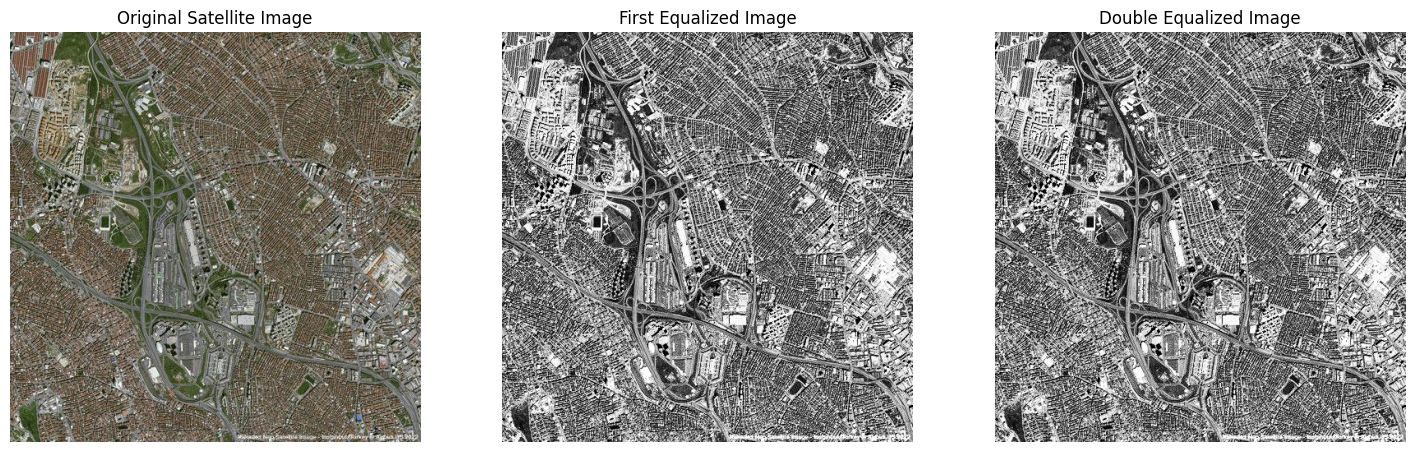

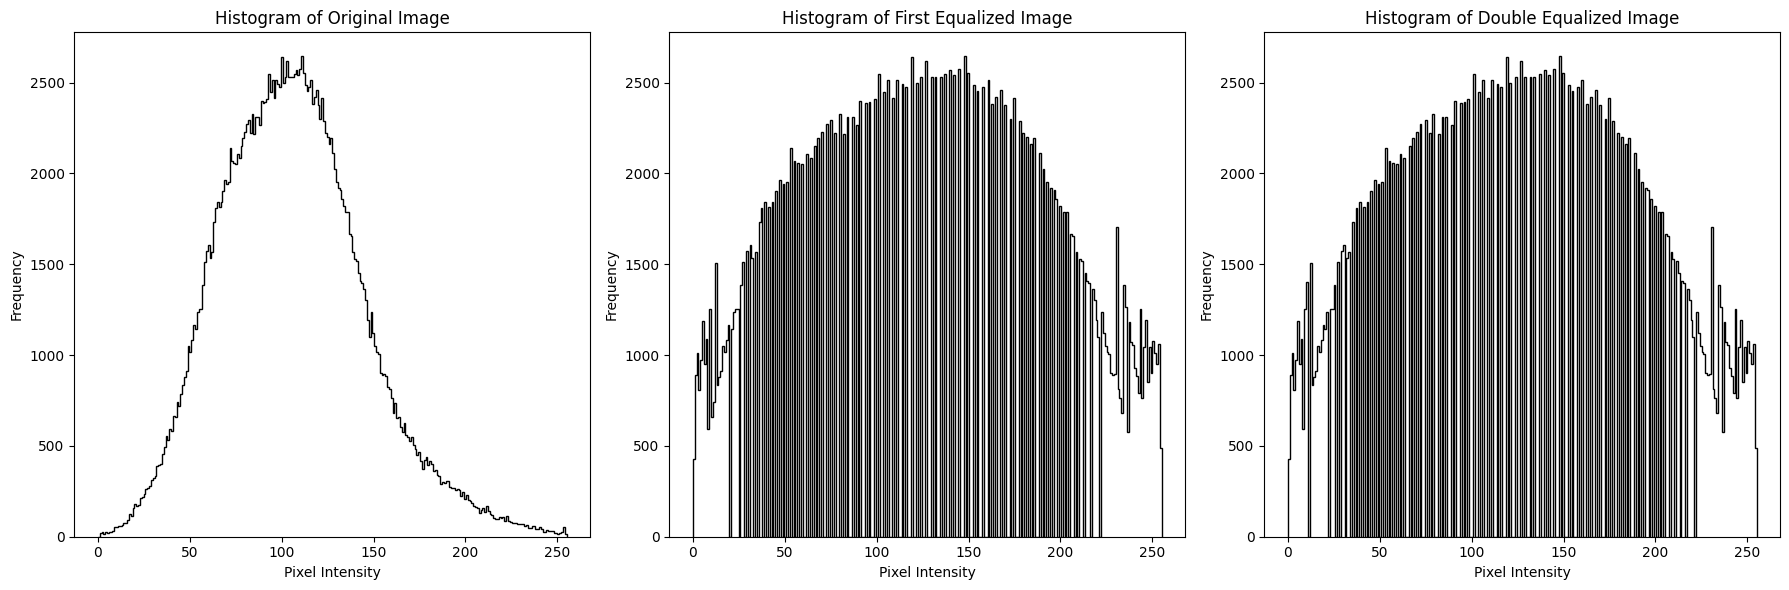

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Scanerio 03.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

double_equalized_image = cv2.equalizeHist(equalized_image)
double_equalized_image_rgb = cv2.cvtColor(double_equalized_image, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Satellite Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB))
plt.title('First Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(double_equalized_image_rgb)
plt.title('Double Equalized Image')
plt.axis('off')

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(gray_image.ravel(), bins=256, histtype='step', color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(equalized_image.ravel(), bins=256, histtype='step', color='black')
plt.title('Histogram of First Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(double_equalized_image.ravel(), bins=256, histtype='step', color='black')
plt.title('Histogram of Double Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Scenario 04:** Transformation Functions for Night-Time Image Brightening

**Explanation:**

I have used logarithmic transformation and gamma correction to enhance the brightness of a night-time image. Then displayed the original image, the log-transformed image for better visibility in low-light areas, and the gamma-corrected image with a gamma value of 2.2 to adjust brightness, all side by side.

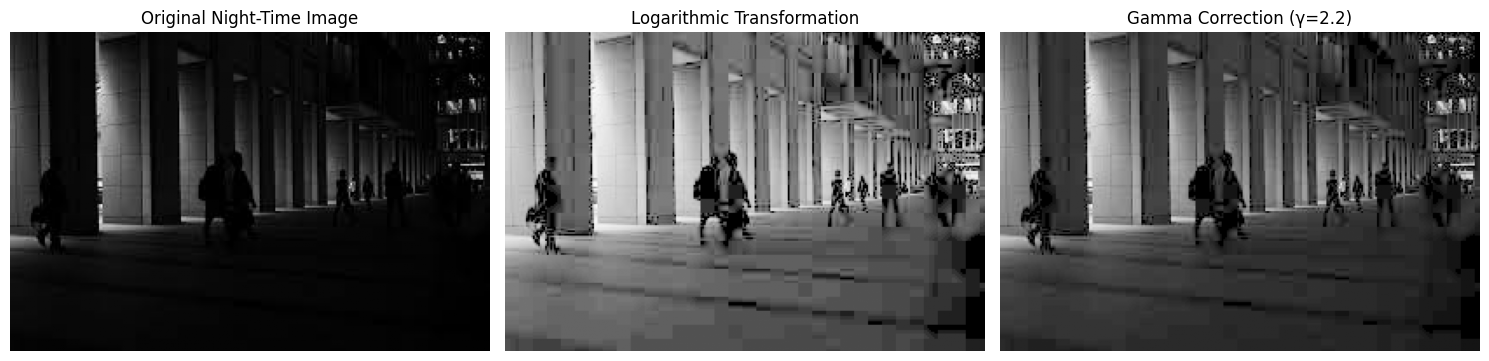

In [18]:
image_path = "/content/Scanerio 04.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

original_image = original_image.astype(np.float32)
log_transformed = cv2.normalize(np.log1p(original_image), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

gamma = 2.2
gamma_corrected = np.array(255 * (original_image / 255) ** (1 / gamma), dtype=np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Night-Time Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title("Logarithmic Transformation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Gamma Correction (γ={gamma})")
plt.axis('off')

plt.tight_layout()
plt.show()

# **Scenario 05:** Local Histogram Equalization for Wildlife Photography

**Explanation:**

I have applied CLAHE (Contrast Limited Adaptive Histogram Equalization) to enhance the contrast of a wildlife image. I displayed the original image alongside the enhanced image to highlight the improvements in local contrast achieved using CLAHE.


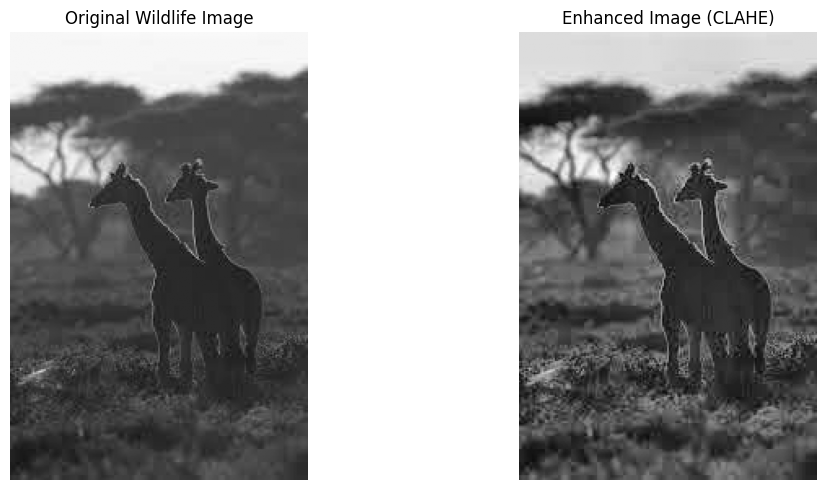

In [19]:
image_path = "/content/Scanerio 05.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(original_image)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Wildlife Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title("Enhanced Image (CLAHE)")
plt.axis('off')

plt.tight_layout()
plt.show()